In [1]:
import pandas as pd

In [2]:
international_debt = pd.read_csv("international_debt.csv")

In [3]:
%%sql
SELECT country_name, SUM(debt) AS total_debt
FROM international_debt
GROUP BY country_name
ORDER BY total_debt DESC;

,country_name,total_debt
0,China,2.857935e+11
1,Brazil,2.806240e+11
2,South Asia,2.476087e+11
3,Least developed countries: UN classification,2.128810e+11
4,Russian Federation,1.912891e+11
...,...,...
119,Turkmenistan,9.513563e+07
120,Timor-Leste,7.100096e+07
121,Comoros,5.756848e+07
122,Tonga,5.520930e+07


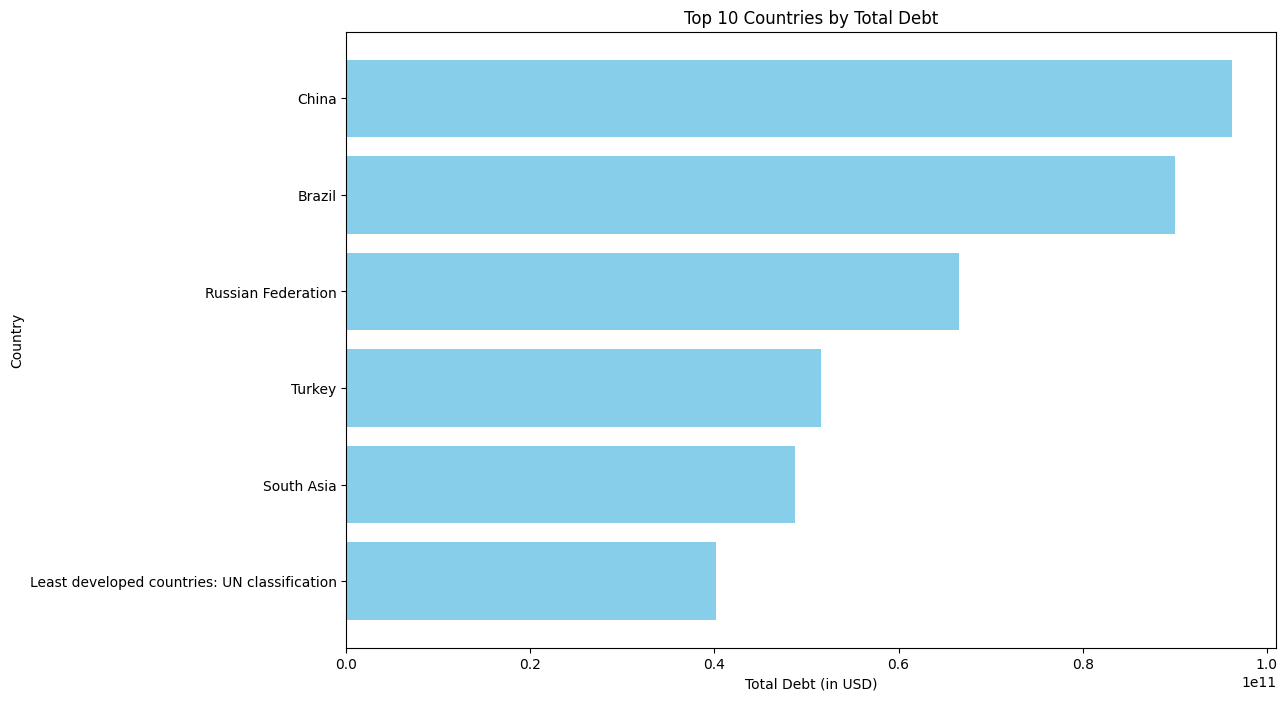

In [16]:
import matplotlib.pyplot as plt

# Create a bar chart
# Top 10 countries with the highest total debt

# Sort the data by 'total_debt' in descending order and get the top 10 countries
top_10_countries = international_debt.sort_values(by='debt', ascending=False).head(10)

# Create a bar chart for the top 10 countries
plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['country_name'], top_10_countries['debt'], color='skyblue')
plt.xlabel('Total Debt (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Debt')
plt.gca().invert_yaxis()  # To display the highest debt country at the top
plt.show()

In [18]:
%%sql
SELECT country_name, (MAX(debt) - MIN(debt)) / MIN(debt) AS debt_growth_rate
FROM international_debt
GROUP BY country_name
ORDER BY debt_growth_rate DESC;

,country_name,debt_growth_rate
0,Russian Federation,6.569758e+06
1,Turkey,9.005117e+04
2,India,7.862833e+04
3,Cote d'Ivoire,3.863959e+04
4,"""Gambia, The""",2.488932e+04
...,...,...
119,Gabon,NaN
120,Mozambique,NaN
121,Nigeria,NaN
122,Serbia,NaN


In [19]:
%%sql
SELECT country_name, SUM(debt) AS total_principal_repayment
FROM international_debt
WHERE indicator_code = 'DT.AMT.DLXF.CD'
GROUP BY country_name
ORDER BY total_principal_repayment DESC;

,country_name,total_principal_repayment
0,China,9.621862e+10
1,Brazil,9.004184e+10
2,Russian Federation,6.658976e+10
3,Turkey,5.155503e+10
4,South Asia,4.875630e+10
...,...,...
119,Tonga,1.036991e+07
120,Guinea-Bissau,6.783629e+06
121,Comoros,4.792269e+06
122,Sao Tome and Principe,2.941396e+06
